In [1]:
import numpy as np
import pandas as pd 

data=pd.read_csv('tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
from sklearn.preprocessing import LabelEncoder

outlook=LabelEncoder ()
temp=LabelEncoder ()
humidity=LabelEncoder ()
windy=LabelEncoder ()
play=LabelEncoder ()

data['outlook']=outlook.fit_transform(data['outlook'])
data['temp']=outlook.fit_transform(data['temp'])
data['humidity']=outlook.fit_transform(data['humidity'])
data['windy']=outlook.fit_transform(data['windy'])
data['play']=outlook.fit_transform(data['play'])

data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [5]:
features_cols=['outlook','temp','humidity','windy']
x=data[features_cols]
y=data.play

x


,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [6]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

classifier=DecisionTreeClassifier(criterion='gini')

classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=classifier.predict(x_test)
x_test

,outlook,temp,humidity,windy
11,0,2,0,1
8,2,0,1,0
5,1,0,1,1


In [15]:
y_test

11    1
8     1
5     0
Name: play, dtype: int32

In [16]:
classifier.score(x_test,y_test)

0.3333333333333333

[Text(0.6666666666666666, 0.875, 'x[2] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.625, 'x[0] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

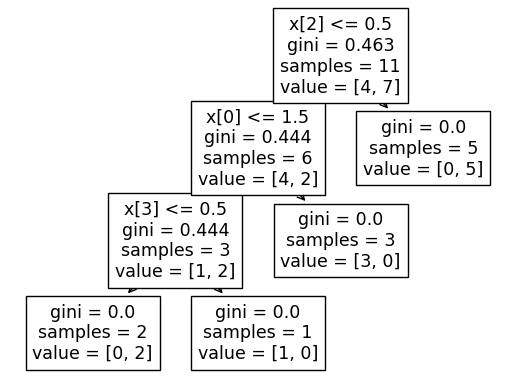

In [17]:
from sklearn import tree 
tree.plot_tree(classifier)

In [20]:
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix
from sklearn import metrics

print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
# Plot the loss curve (mean squared error)
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value -1.9999999999999996
mean_absolute_error : 0.6666666666666666
mean_squared_error :  0.6666666666666666
root_mean_squared_error :  0.816496580927726


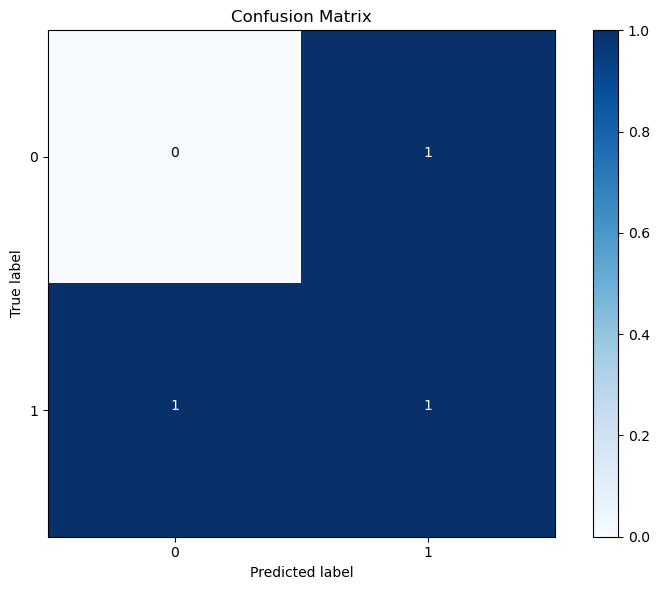

In [26]:
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [31]:
import tkinter as tk
from tkinter import ttk
from sklearn.tree import DecisionTreeClassifier

# Sample data
X = [
    [2, 1, 0, 0],
    [2, 1, 0, 1],
    [0, 1, 0, 0],
    [1, 2, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 0, 1, 1],
    [2, 2, 0, 0],
    [2, 0, 1, 0],
    [1, 2, 1, 0],
    [2, 2, 1, 1],
    [0, 2, 0, 1],
    [0, 1, 1, 0],
    [1, 2, 0, 1]
]

y = ['yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

# Create decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Function to predict
def predict():
    outlook = int(outlook_var.get())
    temp = int(temp_var.get())
    humidity = int(humidity_var.get())
    windy = int(windy_var.get())
    
    prediction = model.predict([[outlook, temp, humidity, windy]])
    result_label.config(text=f"Prediction: {prediction[0]}")

# Create GUI
root = tk.Tk()
root.title("Tennis Prediction")

# Create labels and entry fields
outlook_label = ttk.Label(root, text="Outlook:")
outlook_label.grid(row=0, column=0, padx=5, pady=5)
outlook_var = tk.StringVar()
outlook_entry = ttk.Entry(root, textvariable=outlook_var)
outlook_entry.grid(row=0, column=1, padx=5, pady=5)

temp_label = ttk.Label(root, text="Temp:")
temp_label.grid(row=1, column=0, padx=5, pady=5)
temp_var = tk.StringVar()
temp_entry = ttk.Entry(root, textvariable=temp_var)
temp_entry.grid(row=1, column=1, padx=5, pady=5)

humidity_label = ttk.Label(root, text="Humidity:")
humidity_label.grid(row=2, column=0, padx=5, pady=5)
humidity_var = tk.StringVar()
humidity_entry = ttk.Entry(root, textvariable=humidity_var)
humidity_entry.grid(row=2, column=1, padx=5, pady=5)

windy_label = ttk.Label(root, text="Windy:")
windy_label.grid(row=3, column=0, padx=5, pady=5)
windy_var = tk.StringVar()
windy_entry = ttk.Entry(root, textvariable=windy_var)
windy_entry.grid(row=3, column=1, padx=5, pady=5)

# Button for prediction
predict_button = ttk.Button(root, text="Predict", command=predict)
predict_button.grid(row=4, column=0, columnspan=2, padx=5, pady=5)

# Label to display result
result_label = ttk.Label(root, text="")
result_label.grid(row=5, column=0, columnspan=2, padx=5, pady=5)

root.mainloop()
